In [1]:
trace_file = "./trace_c3_v0"

In [2]:
with open(trace_file) as f:
    content = f.readlines()
# you may also want to remove whitespace characters like `\n` at the end of each line
content = [x.strip() for x in content] 

print len(content)

5772


In [3]:
num_header_lines = 4
content = content[num_header_lines:]

def allocation(v):
    return (v[0] == 'a')

def free(v):
    return (v[0] == 'f')

allocations_dict = dict()
allocations_indices = dict()
freed_dict = dict()

for i, v in enumerate(content):
    v = v.split(" ")
    if allocation(v):
        allocations_indices[v[1]] = v[2]
        if v[2] not in allocations_dict:
            allocations_dict[v[2]] = 1
        else:
            allocations_dict[v[2]] += 1
    elif free(v):
        if v[1] not in freed_dict:
            freed_dict[v[1]] = 'freed'

    

In [4]:
print allocations_dict

{'23109': 1, '17454': 1, '3805': 1, '17769': 1, '19474': 1, '7019': 1, '3492': 1, '21640': 1, '19836': 1, '16586': 1, '3737': 1, '12544': 1, '64': 940, '10382': 1, '24638': 1, '23342': 1, '23300': 1, '10122': 1, '22666': 1, '21580': 1, '2524': 1, '11269': 1, '1717': 1, '5450': 1, '26800': 1, '11876': 1, '30528': 1, '30354': 1, '3997': 1, '6239': 1, '11852': 1, '30253': 1, '30307': 1, '18441': 1, '448': 936, '18990': 1, '17706': 1, '12104': 1, '11665': 1, '23219': 1, '14711': 1, '17686': 1, '21096': 1, '26734': 1, '29307': 1, '5536': 1, '9001': 1, '13727': 1, '15322': 1, '24889': 1, '22741': 1, '20476': 1, '19949': 1, '13596': 1, '24934': 1, '5248': 1, '30880': 1, '18803': 1, '27508': 1, '18844': 1, '23804': 1, '27751': 1, '16158': 1, '17966': 1, '16834': 1, '26382': 1, '9698': 1, '28042': 1, '512': 940, '18925': 1, '16340': 1}


In [5]:
# convert each key to ints, so can sort
# for some reason can't start out with ints, and increment the values.  this works.

for key in allocations_dict:
    val = allocations_dict[key]
    del allocations_dict[key]
    allocations_dict[int(key)] = val

freed_dict_ints = dict()
for key in freed_dict:
    val = freed_dict[key]
    freed_dict_ints[int(key)] = val
    

In [6]:
prev_val = -1
for i in sorted(freed_dict_ints):
    if (prev_val == -1):
        prev_val = i
        continue
    if (prev_val != i - 1):
        print "FOUND A MISSING ONE", prev_val  
    prev_val = i

In [7]:
allocation_amounts = []
allocation_counts = []
allocation_totals = []

for key in sorted(allocations_dict.iterkeys()):
    allocation_amounts.append(key)
    allocation_counts.append(allocations_dict[key])
    allocation_totals.append(allocations_dict[key]*key)
    

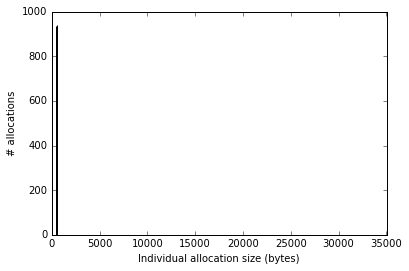

In [21]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = len(allocation_amounts)

ind = np.arange(N)  # the x locations for the groups
width = 1.0       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(allocation_amounts, allocation_counts, width, color='r')
plt.xlabel('Individual allocation size (bytes)')
plt.ylabel('# allocations')
plt.show()

# num times allocated vs. allocation amount

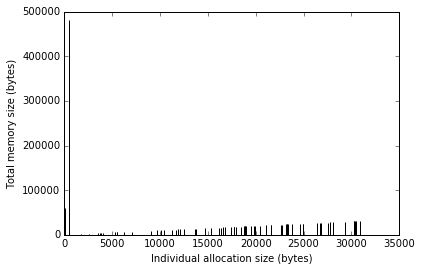

In [22]:
ind = np.arange(N)  # the x locations for the groups
width = 1.0       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(allocation_amounts, allocation_totals, width, color='r')
plt.xlabel('Individual allocation size (bytes)')
plt.ylabel('Total memory size (bytes)')
plt.show()

# memory size vs. allocation amount

In [16]:
# copy over dict
left_at_end_allocations_dict = dict()
for key in allocations_dict:
    val = allocations_dict[key]
    left_at_end_allocations_dict[str(key)] = allocations_dict[key]

print left_at_end_allocations_dict
    
# subtract
for key in freed_dict_ints:
    if str(key) in allocations_indices:
        amount = allocations_indices[str(key)]
        left_at_end_allocations_dict[str(amount)] -= 1
        if left_at_end_allocations_dict[amount] == 0:
            del left_at_end_allocations_dict[amount]
        
print left_at_end_allocations_dict

{'23109': 1, '27508': 1, '17454': 1, '24934': 1, '3805': 1, '17769': 1, '19474': 1, '7019': 1, '3492': 1, '21640': 1, '17706': 1, '16586': 1, '12544': 1, '64': 940, '10382': 1, '23342': 1, '3737': 1, '23300': 1, '26382': 1, '22666': 1, '26800': 1, '2524': 1, '11269': 1, '1717': 1, '5450': 1, '21580': 1, '11876': 1, '18441': 1, '30354': 1, '3997': 1, '24638': 1, '11852': 1, '30253': 1, '30307': 1, '30528': 1, '448': 936, '19836': 1, '18990': 1, '18844': 1, '11665': 1, '23219': 1, '14711': 1, '21096': 1, '26734': 1, '5536': 1, '9001': 1, '13727': 1, '10122': 1, '15322': 1, '24889': 1, '22741': 1, '20476': 1, '19949': 1, '13596': 1, '12104': 1, '5248': 1, '30880': 1, '17686': 1, '18803': 1, '29307': 1, '23804': 1, '27751': 1, '16158': 1, '17966': 1, '16834': 1, '6239': 1, '9698': 1, '28042': 1, '512': 940, '18925': 1, '16340': 1}
{}
